In [ ]:
import os
import numpy as np
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

def makeSets(path):                         #helping function to create all 5 sets
  Set_1 = []
  Set_2 = []
  Set_3 = []
  Set_4 = []
  Set_5 = [] 
  for filename in os.listdir(path):           #for each filename into the folder                          
    s = filename.split("_")[1]
    s = s.split(".")[0]
    number = int(s)
    if((number >= 1) and (number <= 7)):
      Set_1.append(filename)
    elif((number >= 8) and (number <= 19)):
      Set_2.append(filename)
    elif((number >= 20) and (number <= 31)):
      Set_3.append(filename)
    elif((number >= 32) and (number <= 45)):
      Set_4.append(filename)
    elif((number >= 46) and (number <= 64)):
      Set_5.append(filename)
  
  return Set_1,Set_2,Set_3,Set_4,Set_5

def loadImages(path,set_number):
  photos = []
  labels = []
  Set_1,Set_2,Set_3,Set_4,Set_5 = makeSets(path)
  if(set_number == "Set_1"):
    setnumber = Set_1
  if(set_number == "Set_2"):
    setnumber = Set_2
  if(set_number == "Set_3"):
    setnumber = Set_3
  if(set_number == "Set_4"):
    setnumber = Set_4
  if(set_number == "Set_5"):
    setnumber = Set_5

  for filename in os.listdir(path):           #for each filename into the folder
    if(filename in setnumber):
      fullpath = os.path.join(path,filename)   #take full path of each photo into the folder
      photo = Image.open(fullpath)

      person = filename.split("_")[0]
      label = person.split("n")[1]
      category = int(label)
      labels.append(category)

      photo = np.resize(photo,(1,2500))         #create a vector 1x2500      
      photo.reshape(-1)
      photo = photo.flatten()
      photos.append(photo)
  
  return photos,labels


#testing
sets,labels = loadImages("/content/drive/MyDrive/faces","Set_1");
display(sets)
print(labels)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[array([ 94, 114, 115, ...,  76,  67,  70], dtype=uint8),
 array([ 85,  97, 104, ...,  63,  53,  58], dtype=uint8),
 array([82, 95, 99, ..., 93, 83, 91], dtype=uint8),
 array([111, 126, 134, ...,  67,  59,  66], dtype=uint8),
 array([130, 150, 164, ...,  61,  57,  52], dtype=uint8),
 array([ 93, 109, 112, ...,  97,  79,  99], dtype=uint8),
 array([115, 130, 144, ...,  59,  54,  49], dtype=uint8),
 array([ 25,  33,  43, ..., 154, 160, 155], dtype=uint8),
 array([ 51,  57,  64, ..., 133, 135, 128], dtype=uint8),
 array([ 36,  49,  61, ..., 131, 130, 124], dtype=uint8),
 array([ 33,  46,  62, ..., 136, 133, 127], dtype=uint8),
 array([ 22,  27,  42, ..., 119, 122, 114], dtype=uint8),
 array([ 32,  38,  54, ..., 169, 171, 164], dtype=uint8),
 array([ 43,  52,  59, ..., 142, 142, 136], dtype=uint8),
 array([141, 131, 126, ...,  78,  87,  72], dtype=uint8),
 array([98, 89, 92, ..., 85, 88, 71], dtype=uint8),
 array([ 80,  76,  86, ..., 135, 137, 122], dtype=uint8),
 array([111,  91, 100, ...

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def eigenFaces(path,d,set_number):
  testset,y_test = loadImages(path,set_number);
  trainset,y_train = loadImages(path,"Set_1")    #training set

  pca = PCA(n_components=d) #pca with d components

  X_train = pca.fit_transform(trainset)
  X_test = pca.transform(testset)

  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(X_train,y_train)
  print("Classification accuracy of",set_number,":",knn.score(X_test,y_test))

  return pca.components_
  

#testing for d=9
print("Eigenfaces with d=9, training set: Set_1")
ef91 = eigenFaces("/content/drive/MyDrive/faces",9,"Set_1")
ef92 = eigenFaces("/content/drive/MyDrive/faces",9,"Set_2")
ef93 = eigenFaces("/content/drive/MyDrive/faces",9,"Set_3")
ef94 = eigenFaces("/content/drive/MyDrive/faces",9,"Set_4")
ef95 = eigenFaces("/content/drive/MyDrive/faces",9,"Set_5")


Eigenfaces with d=9, training set: Set_1
Classification accuracy of Set_1 : 1.0
Classification accuracy of Set_2 : 0.9
Classification accuracy of Set_3 : 0.425
Classification accuracy of Set_4 : 0.2
Classification accuracy of Set_5 : 0.14736842105263157


In [ ]:
#testing for d = 30
print("Eigenfaces with d=30, training set: Set_1")
ef91 = eigenFaces("/content/drive/MyDrive/faces",30,"Set_1")
ef92 = eigenFaces("/content/drive/MyDrive/faces",30,"Set_2")
ef93 = eigenFaces("/content/drive/MyDrive/faces",30,"Set_3")
ef94 = eigenFaces("/content/drive/MyDrive/faces",30,"Set_4")
ef95 = eigenFaces("/content/drive/MyDrive/faces",30,"Set_5")

Eigenfaces with d=30, training set: Set_1
Classification accuracy of Set_1 : 1.0
Classification accuracy of Set_2 : 0.9416666666666667
Classification accuracy of Set_3 : 0.5083333333333333
Classification accuracy of Set_4 : 0.2
Classification accuracy of Set_5 : 0.14736842105263157


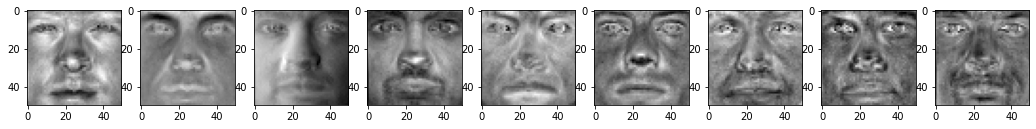

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0,9):
  plt.subplot(4,10,i+1)
  plt.imshow(ef91[i].reshape(50,50),cmap='gray')    #printing pca.components as photos

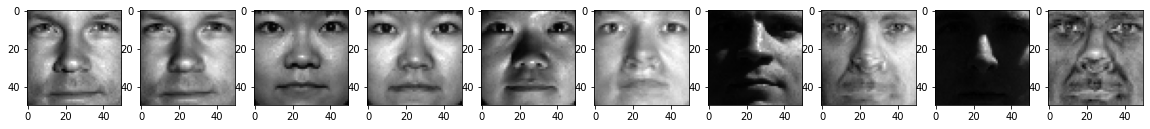

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
import random as rand

def pca(d,path,set_number):
  testset,y_test = loadImages(path,set_number);
  trainset,y_train = loadImages(path,"Set_1")   
  pca = PCA(n_components=d) 
  X_train = pca.fit_transform(trainset)
  X_test = pca.transform(testset)
  recset = pca.inverse_transform(X_test)      #for reconstruction

  return recset

def reconstruction(path,d):
  images = []
  recimages = []
  rand.seed(100)    #just a random seed to print the same random photos every time

  #let's pick random pics to reconstruct
  photos1, labels1 = loadImages(path,"Set_1")
  n1 = rand.randint(0,len(photos1)-1)
  images.append(photos1[n1])

  photos2, labels2 = loadImages(path,"Set_2")
  n2 = rand.randint(0,len(photos2)-1)
  images.append(photos2[n2])

  photos3, labels3 = loadImages(path,"Set_3")
  n3 = rand.randint(0,len(photos3)-1)
  images.append(photos3[n3])

  photos4, labels4 = loadImages(path,"Set_4")
  n4 = rand.randint(0,len(photos4)-1)
  images.append(photos4[n4])

  photos5, labels5 = loadImages(path,"Set_5")
  n5 = rand.randint(0,len(photos5)-1)
  images.append(photos5[n5])


  #reconstruction
  recset1 = pca(d,path,"Set_1")
  recimages.append(recset1[n1])

  recset2 = pca(d,path,"Set_2")
  recimages.append(recset2[n2])

  recset3 = pca(d,path,"Set_3")
  recimages.append(recset3[n3])

  recset4 = pca(d,path,"Set_4")
  recimages.append(recset4[n4])

  recset5 = pca(d,path,"Set_5")
  recimages.append(recset5[n5])

  plt.figure(figsize=(20,10))   
  j =1;
  for i in range(0,5):
    plt.subplot(4,10,i+j)
    plt.imshow(images[i].reshape(50,50),cmap='gray')  #original photo
    plt.subplot(4,10,i+j+1)
    plt.imshow(recimages[i].reshape(50,50),cmap='gray') #reconstructed photo
    j = j +1

#testing
#d = 9
image = reconstruction("/content/drive/MyDrive/faces",9)

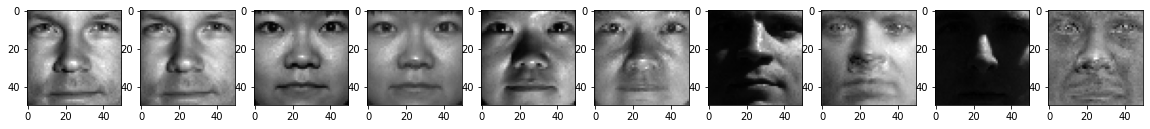

In [ ]:
#d = 30
image = reconstruction("/content/drive/MyDrive/faces",30)

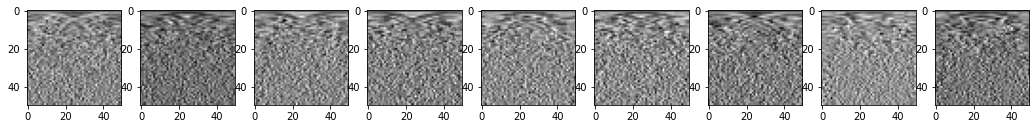

In [ ]:
def Svd(path):
  Set1, Set2, Set3, Set4, Set5 = makeSets(path)
  i=0
  singular_vectors = []
  for filename in os.listdir(path):           #for each filename into the folder
    if(filename in Set1):
      fullpath = os.path.join(path,filename)   #take full path of each photo into the folder
      photo = Image.open(fullpath)
      u,s,v = np.linalg.svd(photo,full_matrices=False)
      singular_vectors.append(v)

  plt.figure(figsize=(20,10))
  for i in range(0,9):
    plt.subplot(4,10,i+1)
    plt.imshow(singular_vectors[i],cmap='gray')    #printing pca.components as photos


#testing
Svd("/content/drive/MyDrive/faces/")